<a href="https://colab.research.google.com/github/Hazuna227/221230039-Pengantar-ML/blob/main/week-03/praktikum_3_visualisasi_data_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Ambil dataset diabetes dari sklearn dalam bentuk pandas DataFrame
X, y = load_diabetes(return_X_y=True, as_frame=True)

# Gabungkan fitur (X) dan target (y) menjadi satu tabel DataFrame
df = X.copy()
df["target"] = y

# Simpan DataFrame ke file CSV (jika ingin menyimpan data secara lokal)
# df.to_csv("diabetes_dataset.csv", index=False)
# print("Dataset disimpan sebagai diabetes_dataset.csv")

Korelasi Fitur dengan Progresi Penyakit Diabetes


=== Korelasi Fitur dengan Progresi Penyakit Diabetes ===
bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64


/tmp/ipython-input-2503342444.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=correlations.values, y=correlations.index, palette="Blues_d") # Assign the barplot to an axes object


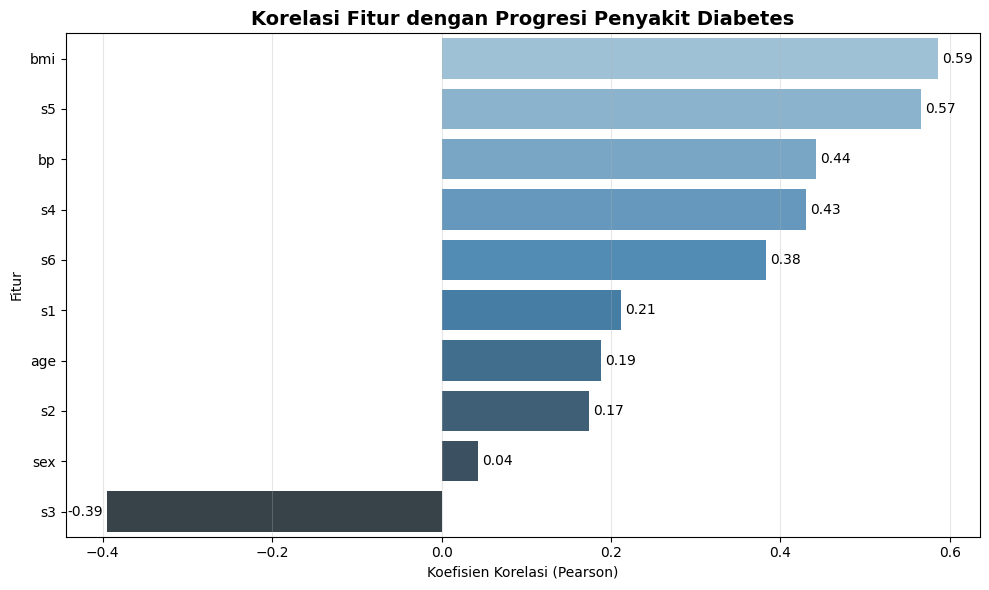

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung korelasi Pearson antara setiap fitur dengan variabel target (progresi penyakit)
correlations = df.corr()["target"].drop("target").sort_values(ascending=False)

print("\n=== Korelasi Fitur dengan Progresi Penyakit Diabetes ===")
print(correlations)

# Visualisasi korelasi menggunakan bar chart
plt.figure(figsize=(10, 6))
# Menggunakan seaborn barplot untuk visualisasi korelasi
ax = sns.barplot(x=correlations.values, y=correlations.index, palette="Blues_d") # Assign the barplot to an axes object

plt.title("Korelasi Fitur dengan Progresi Penyakit Diabetes", fontsize=14, fontweight='bold')
plt.xlabel("Koefisien Korelasi (Pearson)")
plt.ylabel("Fitur")
plt.grid(axis='x', alpha=0.3) # Tambahkan grid horizontal untuk memudahkan pembacaan

# Add numerical labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3) # Add labels with 2 decimal places and padding

plt.tight_layout() # Sesuaikan layout agar tidak ada elemen yang tumpang tindih
plt.savefig("barchart_korelasi_fitur_diabetes.png") # Simpan diagram sebagai file gambar
plt.show() # Tampilkan diagram

Distribusi dan Outlier Setiap Fitur Diabetes Dataset

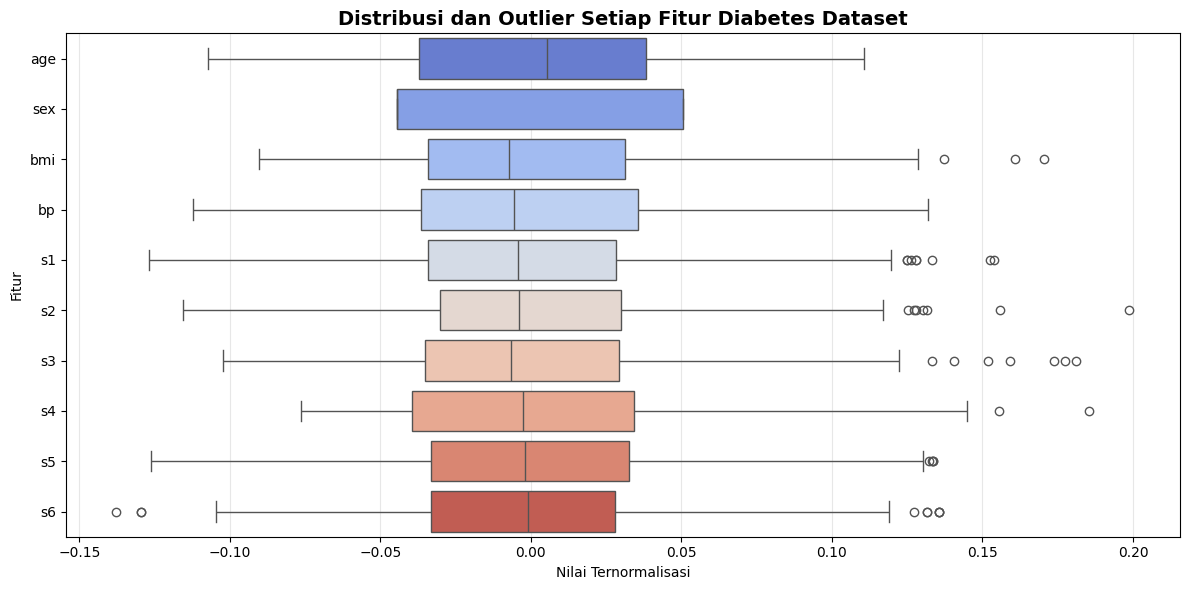

In [ ]:
# Bagian 2: Boxplot untuk melihat distribusi dan mendeteksi outlier
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
# Buat boxplot untuk setiap fitur (kecuali kolom 'target')
# orient='h' membuat boxplot horizontal
# palette memilih skema warna
sns.boxplot(data=df.drop(columns=["target"]), orient="h", palette="coolwarm")

plt.title("Distribusi dan Outlier Setiap Fitur Diabetes Dataset", fontsize=14, fontweight='bold')
plt.xlabel("Nilai Ternormalisasi")
plt.ylabel("Fitur")
plt.grid(axis='x', alpha=0.3) # Tambahkan grid horizontal
plt.tight_layout() # Sesuaikan layout
plt.show() # Tampilkan diagram

Hubungan Setiap Fitur dengan Target (Linear / Non-Linear

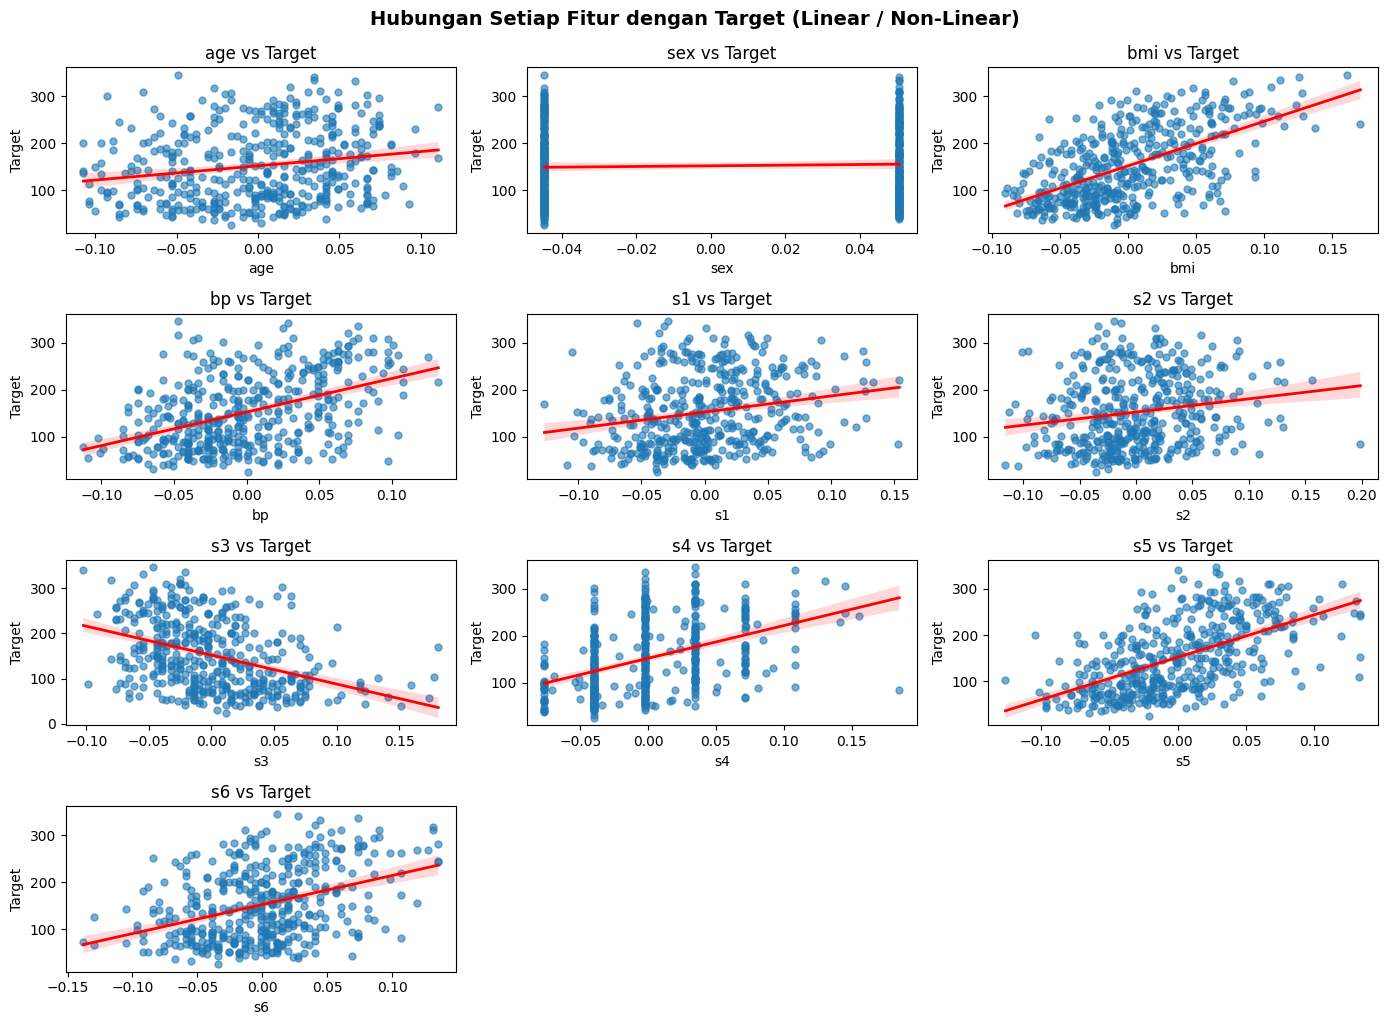

In [ ]:
# Bagian 3: Scatter Plot dengan Garis Regresi (Hubungan Linear/Non-linear)
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil nama-nama kolom fitur (kecuali kolom 'target')
feature_columns = df.columns.drop("target")

plt.figure(figsize=(14, 10))

# Buat scatter plot + garis regresi untuk setiap fitur terhadap target
# Iterasi melalui setiap fitur dan buat subplot
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(4, 3, i) # Buat subplot dalam grid 4x3
    sns.regplot(
        x=df[feature], # Data fitur pada sumbu x
        y=df["target"], # Data target pada sumbu y
        scatter_kws={'alpha':0.6, 's':25}, # Atur transparansi dan ukuran titik scatter
        line_kws={'color':'red', 'lw':2} # Atur warna dan ketebalan garis regresi
    )
    plt.title(f"{feature} vs Target") # Judul subplot
    plt.xlabel(feature) # Label sumbu x
    plt.ylabel("Target") # Label sumbu y

plt.tight_layout() # Sesuaikan layout subplot
plt.suptitle("Hubungan Setiap Fitur dengan Target (Linear / Non-Linear)", fontsize=14, fontweight='bold', y=1.02) # Judul utama untuk semua subplot
plt.show() # Tampilkan diagram

Correlation Heatmap antar Fitur dan Target

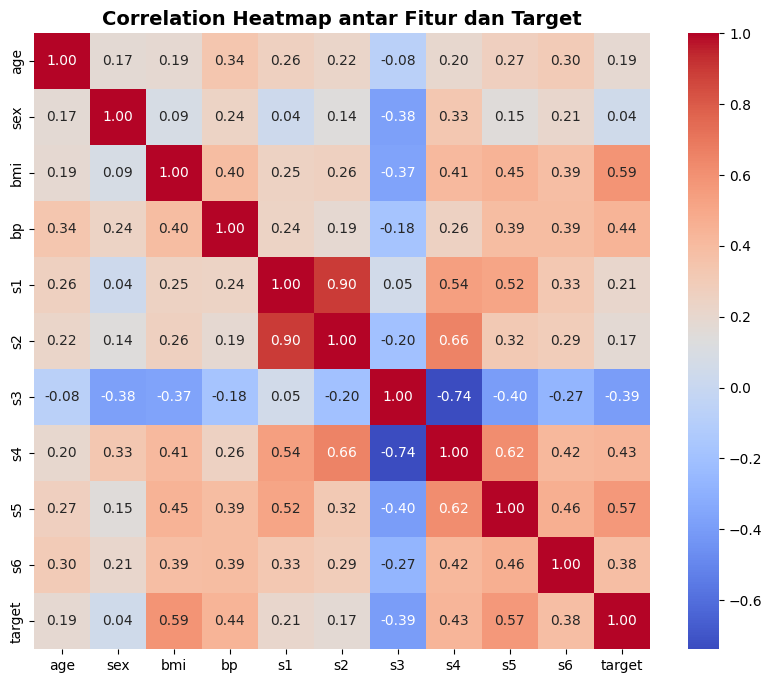

In [ ]:
# Bagian 4: Visualisasi yang Efektif untuk Hubungan Multivariat (Heatmap Korelasi)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
# Buat heatmap korelasi antar semua kolom dalam DataFrame
# annot=True menampilkan nilai korelasi pada heatmap
# fmt=".2f" memformat nilai korelasi menjadi 2 angka desimal
# cmap="coolwarm" menggunakan skema warna coolwarm
# square=True membuat sel heatmap berbentuk persegi
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap antar Fitur dan Target", fontsize=14, fontweight='bold') # Judul heatmap
plt.show() # Tampilkan heatmap

Pair Plot Multivariat antara Fitur dan Target

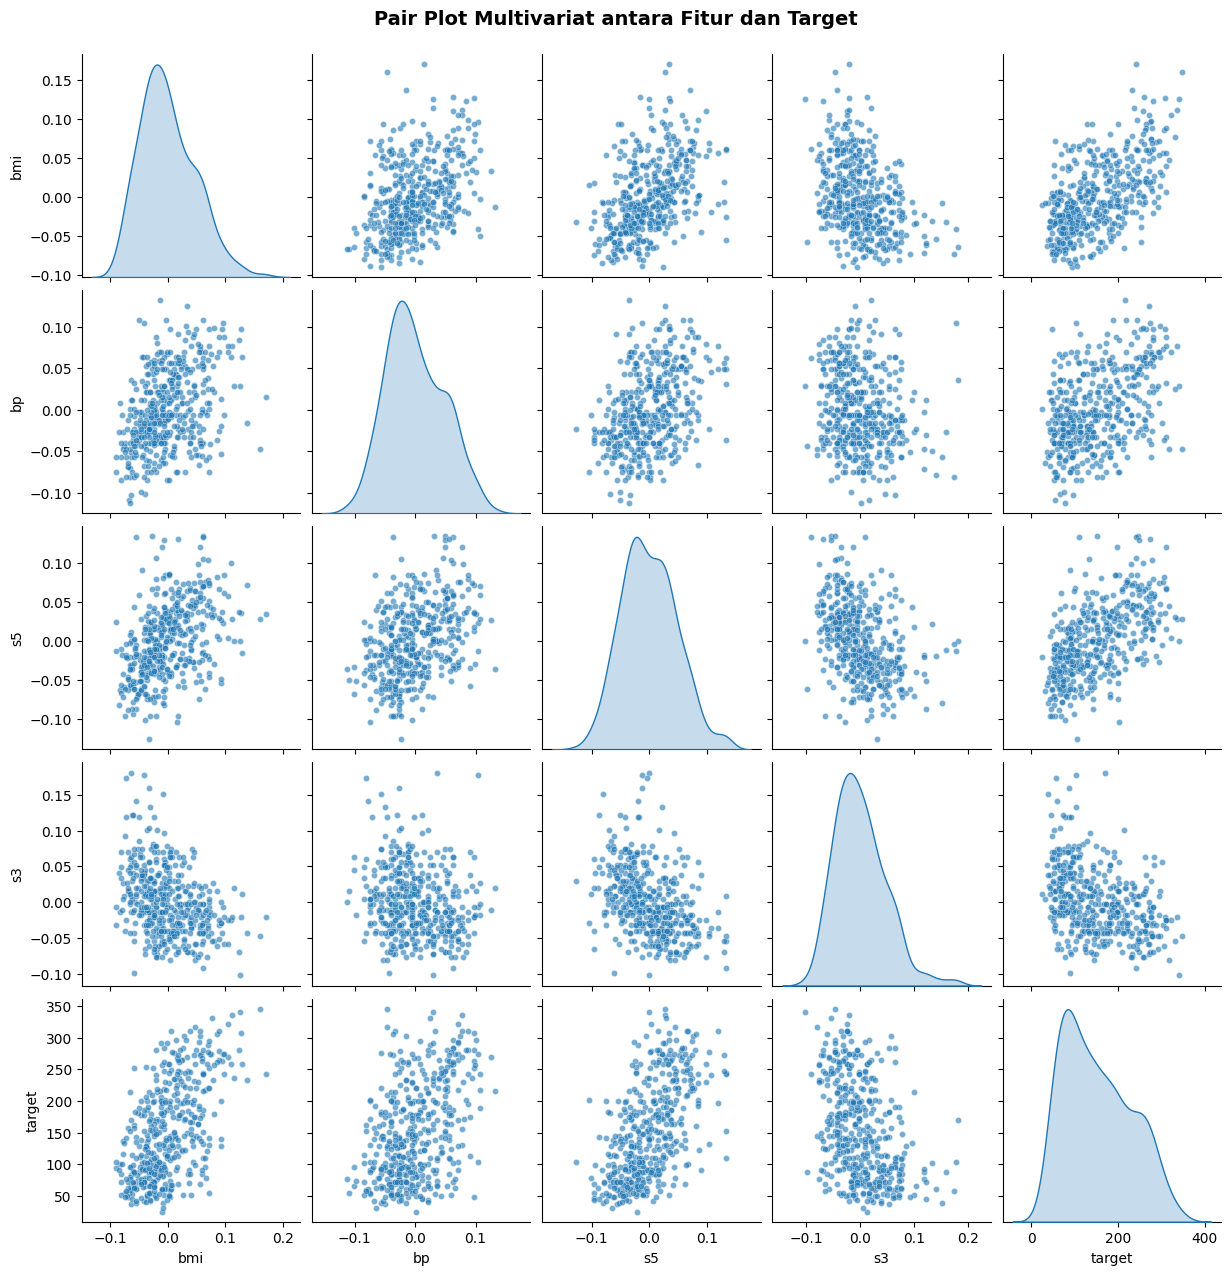

In [ ]:
# Bagian 4: Visualisasi yang Efektif untuk Hubungan Multivariat (Pair Plot)
# Pilih fitur paling relevan berdasarkan analisis korelasi atau pengetahuan domain
selected_features = ["bmi", "bp", "s5", "s3", "target"]

# Buat pair plot untuk melihat hubungan antar pasangan fitur yang dipilih
# diag_kind='kde' menampilkan estimasi densitas kernel pada diagonal
# plot_kws mengatur properti scatter plot
sns.pairplot(df[selected_features], diag_kind='kde', plot_kws={'alpha':0.6, 's':20})
plt.suptitle("Pair Plot Multivariat antara Fitur dan Target", fontsize=14, fontweight='bold', y=1.02) # Judul utama
plt.show() # Tampilkan pair plot

Koefisien Regresi (Pengaruh terhadap Target

/tmp/ipython-input-718067288.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis") # Gunakan palet warna 'viridis'


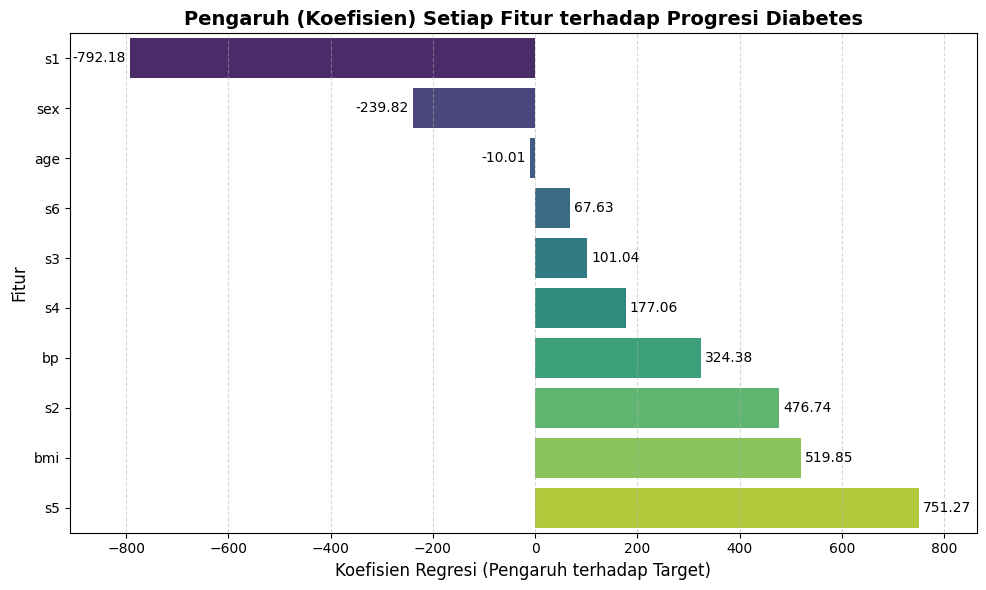

  Feature  Coefficient
4      s1  -792.175639
1     sex  -239.815644
0     age   -10.009866
9      s6    67.626692
6      s3   101.043268
7      s4   177.063238
3      bp   324.384646
5      s2   476.739021
2     bmi   519.845920
8      s5   751.273700


In [ ]:
#Bagian 5: Bagaimana Membedakan Pengaruh Masing-Masing Fitur terhadap Target? (Analisis Koefisien Regresi)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Import seaborn untuk estetika yang lebih baik

# Buat model regresi linier
model = LinearRegression()
# Latih model menggunakan data fitur (X) dan target (y)
model.fit(X, y)

# Simpan koefisien (bobot) yang didapatkan dari model regresi dalam DataFrame
coef_df = pd.DataFrame({
    "Feature": X.columns, # Nama fitur
    "Coefficient": model.coef_ # Nilai koefisien untuk setiap fitur
}).sort_values("Coefficient", ascending=True) # Urutkan berdasarkan nilai koefisien secara menaik untuk barh plot

# Visualisasi koefisien dalam bentuk bar chart horizontal
plt.figure(figsize=(10, 6)) # Atur ukuran gambar
# Buat bar plot menggunakan seaborn
ax = sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis") # Gunakan palet warna 'viridis'

plt.xlabel("Koefisien Regresi (Pengaruh terhadap Target)", fontsize=12) # Label sumbu x
plt.ylabel("Fitur", fontsize=12) # Label sumbu y
plt.title("Pengaruh (Koefisien) Setiap Fitur terhadap Progresi Diabetes", fontweight="bold", fontsize=14) # Judul diagram
plt.grid(axis='x', alpha=0.5, linestyle='--') # Tambahkan garis grid putus-putus pada sumbu x

# Tambahkan label numerik (nilai koefisien) pada setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3) # Format angka menjadi 2 desimal, tambahkan padding

# Atur batas sumbu x untuk memberikan ruang yang cukup bagi label
max_coef = coef_df["Coefficient"].max()
min_coef = coef_df["Coefficient"].min()
# Tambahkan margin 15% di kedua sisi untuk memastikan label terlihat
plt.xlim(min_coef - abs(min_coef)*0.15, max_coef + abs(max_coef)*0.15)

plt.tight_layout() # Sesuaikan layout
plt.show() # Tampilkan diagram

# Cetak DataFrame yang berisi fitur dan koefisiennya
print(coef_df)